# **DATA CLEANING PROJECT - 1**

**Project Details**

| | Details |
|----------|---------|
| Author   | Alfrethanov Christian Wijaya |
| Dataset  | telco-dataset.csv |
| Goal     | Perform Data Cleaning for a Telecommunication or Communication Service Provider (CSP) Company dataset. |

<br>

**Data Details**

| Column Name     | Description                                                       |
|-----------------|-------------------------------------------------------------------|
| UpdatedAt       | The period when the data was taken                                |
| customerID      | Unique identifier for each customer                                |
| gender          | The customer's gender (Male, Female)                               |
| SeniorCitizen   | Whether the customer is a senior citizen or not (1 for yes, 0 for no)|
| Partner         | Whether the customer has a partner or not (Yes, No)                |
| Dependents      | Whether the customer has dependents or not (Yes, No)               |
| tenure          | Number of months the customer has stayed with the company          |
| PhoneService    | Whether the customer has a phone service or not (Yes, No)           |
| MultipleLines   | Whether the customer has multiple lines or not (Yes, No, No phone service)|
| InternetService | The customer's internet service provider (DSL, Fiber optic, No)     |
| OnlineSecurity  | Whether the customer has online security or not (Yes, No, No internet service)|
| OnlineBackup    | Whether the customer has online backup or not (Yes, No, No internet service)|
| DeviceProtection| Whether the customer has device protection or not (Yes, No, No internet service)|
| TechSupport     | Whether the customer has tech support or not (Yes, No, No internet service)|
| StreamingTV     | Whether the customer has streaming TV or not (Yes, No, No internet service)|
| StreamingMovies | Whether the customer has streaming movies or not (Yes, No, No internet service)|
| Contract        | The contract term of the customer (Month-to-month, One year, Two year)|
| PaperlessBilling| Whether the customer has paperless billing or not (Yes, No)        |
| PaymentMethod   | The customer's payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))|
| MonthlyCharges  | The amount charged to the customer monthly                         |
| TotalCharges    | The total amount charged to the customer                           |
| Churn           | Whether the customer churned or not (Yes or No)                    |

---

<center>

# **START**

</center>

---

# **Importing Library**

In [ ]:
# Import Libraries
import pandas as pd

# **Import Dataset**

In [ ]:
# Import Dataset
df = pd.read_csv('telco-dataset.csv')

# **Data Cleaning / Preprocessing**

In [ ]:
# Shape (Rows x Columns)
print('Rows x Columns: ', df.shape)

# Show Dataset
print('\nTELCO DATASET:\n', df.head(5))

# Numbers of Unique values in 'customerID' column
print('\nUnique Values in customerID: ', df.customerID.nunique())

Rows x Columns:  (7113, 22)

TELCO DATASET:
    UpdatedAt   customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     202006  45759018157  Female              0     Yes         No     1.0   
1     202006  45557574145    Male              0      No         No    34.0   
2     202006  45366876421    Male              0      No         No     2.0   
3     202006  45779536532    Male              0      No         No    45.0   
4     202006  45923787906  Female              0      No         No     2.0   

  PhoneService     MultipleLines InternetService  ... DeviceProtection  \
0           No  No phone service             DSL  ...               No   
1          Yes                No             DSL  ...              Yes   
2          Yes                No             DSL  ...               No   
3           No  No phone service             DSL  ...              Yes   
4          Yes                No     Fiber optic  ...               No   

  TechSupport StreamingTV Streaming

## **Filtering 'customerID' column**

Customers ID criteria :
1. The character length is 11-12.
2. Consists of digits only, no characters other than digits are allowed.
3. Starts with the number 45 in the first two digits.

In [ ]:
# Creating new column named 'valid_id' that specify each of the customerID's format is True or False in 'customerID' column
df['valid_id'] = df['customerID'].astype(str).str.match(r'(45\d{9,10})')

print('Column "valid_id" created\n', df[['customerID','valid_id']].head(), '\n')

# Take only the right customer's ID format and Dropping the 'valid_id' column because we'll only use it this once
df = (df[df['valid_id'] == True]).drop('valid_id', axis=1)

print('Final customerID :', df['customerID'].count())

Column "valid_id" created
     customerID  valid_id
0  45759018157      True
1  45557574145      True
2  45366876421      True
3  45779536532      True
4  45923787906      True 

Final customerID : 7006


## **Drop Duplicates**

Goals :
1. Dropping all duplicate rows
2. Dropping all duplicate Customers ID sorted by the latest inputted Customers ID

In [ ]:
# Dropping all duplicate Rows
df.drop_duplicates()

# Dropping duplicate Customers ID sorted by the latest inputted Customers ID
df = df.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])

print('Final customerID :',df['customerID'].count())

Final customerID : 6993


## **Handling Missing Values**

### **.dropna()**

Dropping all Missing Values in **Churn** column with `.dropna()` function

In [ ]:
print('Total missing values in "Churn" column ', df['Churn'].isnull().sum())

# Dropping all Rows that contains missing values in 'Churn' column
df.dropna(subset=['Churn'], inplace=True)

print('Final Total Rows and Columns of the dataset ', df.shape)

Total missing values in "Churn" column  43
Final Total Rows and Columns of the dataset  (6950, 22)


`inplace = True`

--> Decides that the changes will be applied in the original dataset

`inplace = False`

--> Decides that the changes will not be applied in the original dataset and returns a new copy of dataset

### **.fillna()**

Filling the Missing Values in every columns that contains Missing Values with `.fillna()` function.

@Notes: Fill the Missing Values in **tenure** column with 11 (request from the Data Modeller division)

Determine :

1. Whether there are still missing values in the data.
2. The number of missing values for each variable.
3. Handle the missing values.

In [ ]:
print('Missing Values Status :',df.isnull().values.any())
print('\nSum of Missing Values in each columns are:')
print(df.isnull().sum().sort_values(ascending=False))

# Filling the missing values in 'tenure' column with 11
df['tenure'].fillna(11, inplace=True)

# Handling missing values in numerical columns
for col_name in list(['MonthlyCharges','TotalCharges']):
	median = df[col_name].median()
	df[col_name].fillna(median, inplace=True)

print('\nThe number of Missing Values after imputing the data is:')
print(df.isnull().sum().sort_values(ascending=False))

Missing Values Status : True

Sum of Missing Values in each columns are:
tenure              99
MonthlyCharges      26
TotalCharges        15
UpdatedAt            0
DeviceProtection     0
PaymentMethod        0
PaperlessBilling     0
Contract             0
StreamingMovies      0
StreamingTV          0
TechSupport          0
OnlineBackup         0
customerID           0
OnlineSecurity       0
InternetService      0
MultipleLines        0
PhoneService         0
Dependents           0
Partner              0
SeniorCitizen        0
gender               0
Churn                0
dtype: int64

The number of Missing Values after imputing the data is:
UpdatedAt           0
customerID          0
TotalCharges        0
MonthlyCharges      0
PaymentMethod       0
PaperlessBilling    0
Contract            0
StreamingMovies     0
StreamingTV         0
TechSupport         0
DeviceProtection    0
OnlineBackup        0
OnlineSecurity      0
InternetService     0
MultipleLines       0
PhoneService        

## **Handling Outliers**

### **Boxplot**

Detecting outliers with `.boxplot()` function from Seaborn library

Column statistical value: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.477266       65.783741   2305.083460
std      25.188910       50.457871   2578.651143
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     500.000000     2311.000000  80000.000000


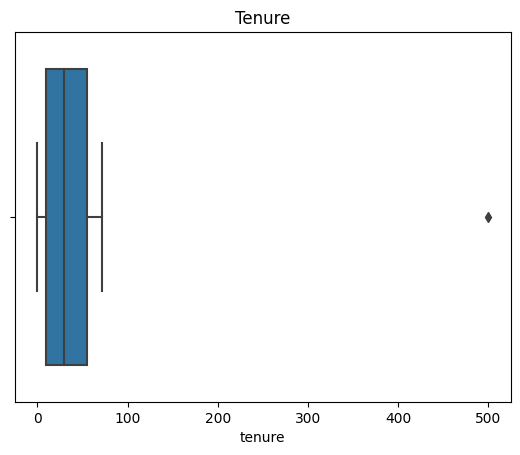

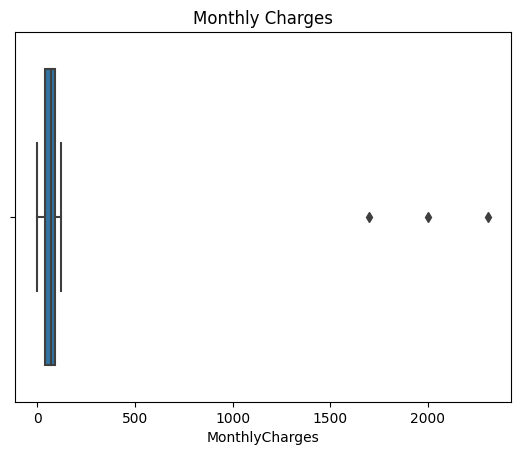

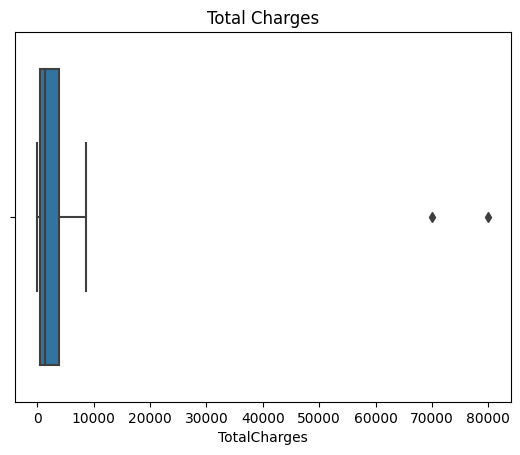

In [ ]:
print('Column statistical value: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

# Import Libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Outlier in 'tenure' column
plt.figure()
sns.boxplot(x=df['tenure'])
plt.title('Tenure')
plt.show()

# Outlier in 'tenure' column
plt.figure()
sns.boxplot(x=df['MonthlyCharges'])
plt.title('Monthly Charges')
plt.show()

# Outlier in 'tenure' column
plt.figure()
sns.boxplot(x=df['TotalCharges'])
plt.title('Total Charges')
plt.show()

### **Replacing Outliers**

Replacing outliers with the **Maximum** / **Minimum** value of each columns that contain outliers

In [ ]:
# Handling outliers with IQR
# Q1 of tenure, MonthlyCharges, and TotalCharges
Q1 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
# Q3 of tenure, MonthlyCharges, and TotalCharges
Q3 = (df[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

# IQR Formula
IQR = Q3 - Q1

# Maximum value of each columns (tenure, MonthlyCharges, TotalCharges)
maximum = Q3 + (1.5*IQR)
print('The maximum value of each columns: ')
print(maximum)

# Minimum value of each columns (tenure, MonthlyCharges, TotalCharges)
minimum = Q1 - (1.5*IQR)
print('\nThe minimum value of each columns: ')
print(minimum)

# Outliers above the maximum value of each columns
more_than = (df > maximum)
# Outliers below the minimum value of each columns
lower_than = (df < minimum)

# Replacing the outliers with the Maximum / Minimum value of each columns
df = df.mask(more_than, maximum, axis=1)
df = df.mask(lower_than, minimum, axis=1)

print('\nThe data distributions after removing the outliers: ')
print(df[['tenure','MonthlyCharges','TotalCharges']].describe())

The maximum value of each columns: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

The minimum value of each columns: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64

The data distributions after removing the outliers: 
            tenure  MonthlyCharges  TotalCharges
count  6950.000000     6950.000000   6950.000000
mean     32.423165       64.992201   2286.058750
std      24.581073       30.032040   2265.702553
min       0.000000        0.000000     19.000000
25%       9.000000       36.462500    406.975000
50%      29.000000       70.450000   1400.850000
75%      55.000000       89.850000   3799.837500
max     124.000000      169.931250   8889.131250


<ipython-input-9-c351194251fa>:21: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  more_than = (df > maximum)
<ipython-input-9-c351194251fa>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  lower_than = (df < minimum)


## **Standardization**

### **Unstandardized Values Detection**

In the process of **Standardization**, the first step is to check for any unique values that should not be present, especially in the categorical columns. The unique values that should not be present refer to **unstandardized values**.

In [ ]:
for col_name in list(['gender','SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','InternetService',
                      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                      'Contract','PaperlessBilling','PaymentMethod','Churn']):
  print('\nUnique Values Count \033[1m' + 'Before Standardized\033[0m for',col_name,'column')
  print(df[col_name].value_counts())


Unique Values Count Before Standardized for gender column
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized for SeniorCitizen column
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized for Partner column
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized for Dependents column
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized for PhoneService column
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized for MultipleLines column
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized for InternetService column
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Coun

### **Correcting the Unstandardized Values**

Upon identifying **unstandardized values** through the Unstandardized Values Detection process, it is necessary to rectify these values and ensure they are replaced with their correct meaning.

<br>

| Unstandardized | Standardized |
|----------------|--------------|
| Wanita | Female |
| Laki-Laki | Male |
| Churn | Yes |
| Iya | Yes |

In [ ]:
# Replacing the unstandardized values into the correct values
df = df.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Result
for col_name in list(['gender','Dependents','Churn']):
	print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
	print(df[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64
